# 🎓 Library

In [2]:
# Misc
import numpy as np
import pandas as pd
import os

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Models & tuning
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

# Plot
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns


In [ ]:
# Environment variables

RAW_DATA = f"{os.getcwd()}/data"
SEED = 42

print(f"RAW_DATA: {RAW_DATA}")

RAW_DATA: /home/tofeha/ING2/ING2/FTML/FTML-Project/5.Classification_on_a_given_dataset/data


We extract our data

In [4]:
X_train = np.load(f"{RAW_DATA}/X_train.npy").astype(np.float32)
y_train = np.load(f"{RAW_DATA}/y_train.npy").astype(np.int32)

X_test = np.load(f"{RAW_DATA}/X_test.npy").astype(np.float32)
y_test = np.load(f"{RAW_DATA}/y_test.npy").astype(np.int32)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 30), (2000,), (2000, 30), (2000,))

## Correlation matrix

Let's see the correlation between the features.

In [6]:
feature_corr = np.corrcoef(X_train, rowvar=False)

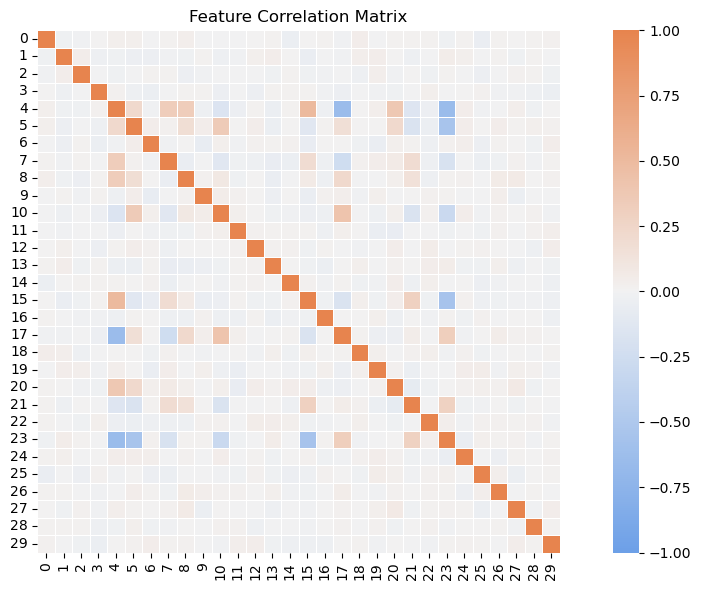

In [7]:
plt.figure(figsize=(11, 6))
sns.heatmap(feature_corr,
            annot=False,
            fmt=".2f",
            cmap=sns.diverging_palette(250, 30, l=65, center="light", as_cmap=True),
            square=True,
            linewidths=0.5,
            vmin=-1,
            vmax=1)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

Interpretation of this matrix depends on the model used.

## Step 1: Preprocessing

We scale the input dataset.


In [8]:
X_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Step 2: Model creation

### Model A: Logistic Regression

In [9]:
classifiers_with_params : list[tuple] = [
    (
        LogisticRegression(random_state=SEED),
        {
            "logisticregression__penalty": ["l2"],
            "logisticregression__C": [0.01, 0.1, 1, 10],
            "logisticregression__solver": ["lbfgs", "saga", "liblinear"],
        }
    ),
    (
        RidgeClassifier(random_state=SEED),
        {
            "ridgeclassifier__alpha": [0.1, 1.0, 10.0]
        }
    ),
    (
        SVC(random_state=SEED),
        {
            "svc__C": [0.01, 0.1, 1, 10],
            "svc__kernel": ["linear", "rbf"],
            "svc__gamma": ["scale", "auto"]
        }
    ),
    (
        KNeighborsClassifier(),
        {
            "kneighborsclassifier__n_neighbors": [3, 5, 7],
            "kneighborsclassifier__weights": ["uniform", "distance"]
        }
    ),
]

## Step 3: Training & Evaluation

In [10]:
# Loop over classifiers
for classifier, param_grid in classifiers_with_params:
    pipeline = make_pipeline(classifier)
    
    search_space = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
    search_space.fit(X_train_scaled, y_train)
    
    print(f"\n{classifier.__class__.__name__}")
    print(f"Best params: {search_space.best_params_}")
    print(f"Best CV score: {search_space.best_score_:.4f}")


LogisticRegression
Best params: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Best CV score: 0.7150

RidgeClassifier
Best params: {'ridgeclassifier__alpha': 10.0}
Best CV score: 0.7125

SVC
Best params: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best CV score: 0.7565

KNeighborsClassifier
Best params: {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__weights': 'uniform'}
Best CV score: 0.7270


In [11]:
model = search_space.best_estimator_

In [12]:
y_pred = model.predict(X_test_scaled)

In [13]:
model.score(X_test_scaled, y_test)

0.761